In [83]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt


In [31]:
barcodes = pd.read_csv('/Users/christoffer/Downloads/data_barcodes.tsv.gz', sep = '\t', header = None)
features = pd.read_csv('/Users/christoffer/Downloads/data_features.tsv.gz', sep = '\t', header = None)
meta = pd.read_csv('/Users/christoffer/Downloads/meta (2).tsv', sep = '\t')

In [11]:
adata = sc.read_mtx('/Users/christoffer/Downloads/data_matrix.mtx.gz')

In [17]:
adata = adata.T

In [32]:
adata.obs = meta.set_index('cellId')

In [33]:
adata.var = features

In [38]:
adata.obs['orig.ident_merge'].unique()

array(['Ctrl', 'Early', 'Late', 'Peak'], dtype=object)

In [40]:
adata.X.toarray().max()

8.348898

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


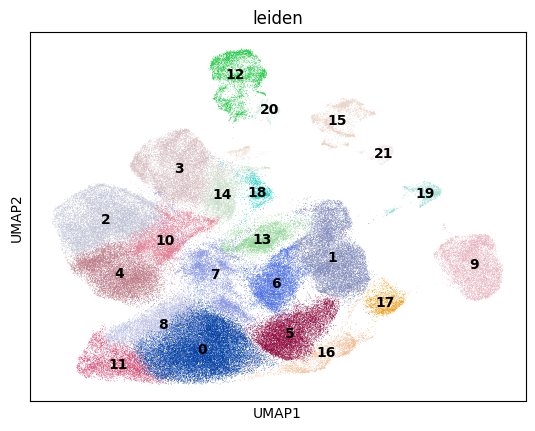

In [43]:
sc.tl.pca(adata, n_comps=50, svd_solver="arpack")

sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)  # tune n_neighbors/n_pcs
sc.tl.umap(adata, min_dist=0.4)                   # tune min_dist if needed

# =========================
# 6) Clustering (Leiden/Louvain)
# =========================
sc.tl.leiden(adata, resolution=0.6)  # try 0.3–1.0

# =========================
# 7) Plot UMAP
# =========================
sc.pl.umap(adata, color=["leiden"], legend_loc="on data")

In [57]:
adata.var_names = adata.var[0].astype(str)


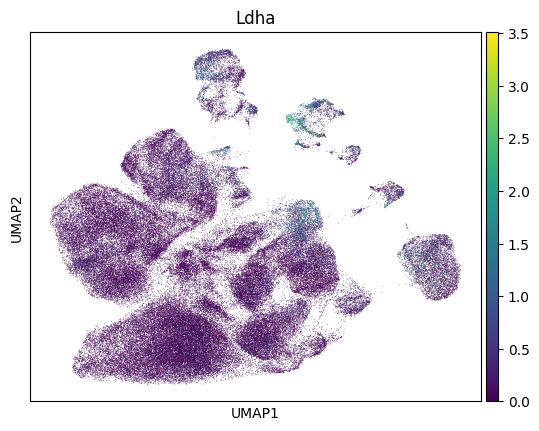

In [59]:
sc.pl.umap(adata, color=["Ldha"], legend_loc="on data")

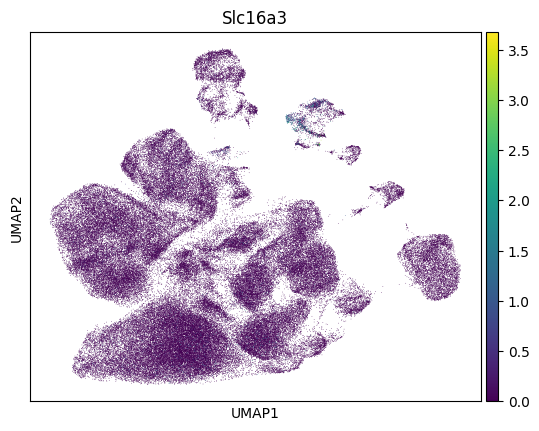

In [61]:
sc.pl.umap(adata, color=["Slc16a3"], legend_loc="on data")

In [ ]:
 # biogenesis counterpoint
    "",
    
    # ETC / TCA survivors after cleanup
    "Ndufs1","Sdha","Sdhb"
]

# Add mitochondrial dynamics
mito_dynamics = ["Mfn1","Mfn2","Opa1","Dnm1l","Miga1","Miga2"]

MOL2


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


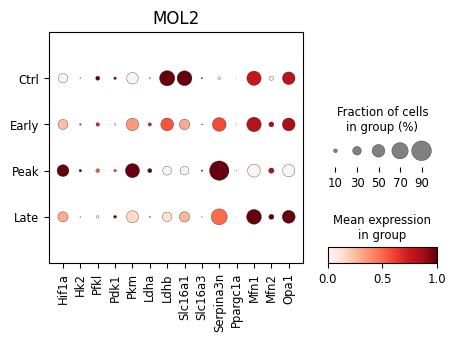

MOL56


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


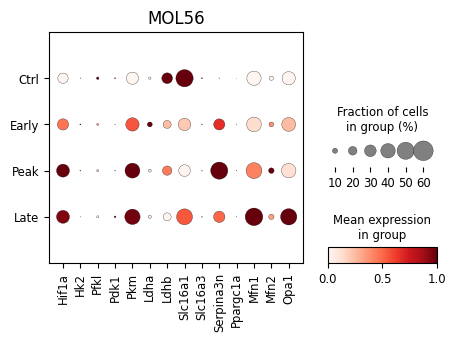

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


OPC


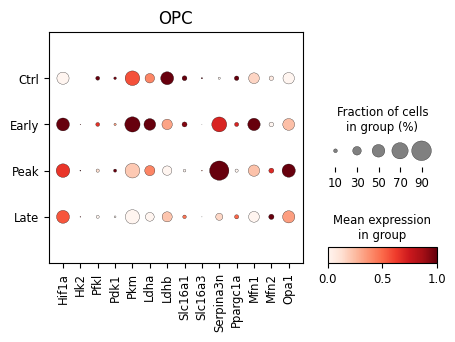

Astro


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


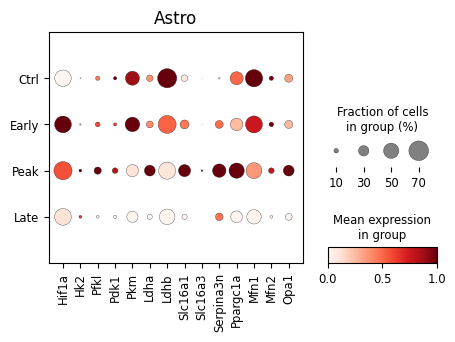

MOL1


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


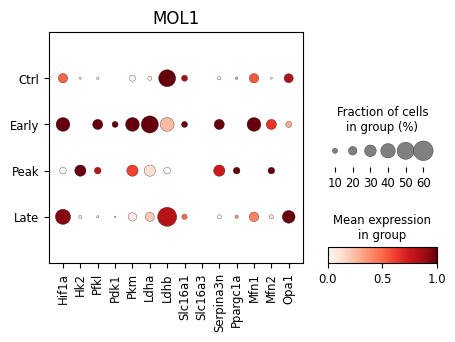

Micro


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


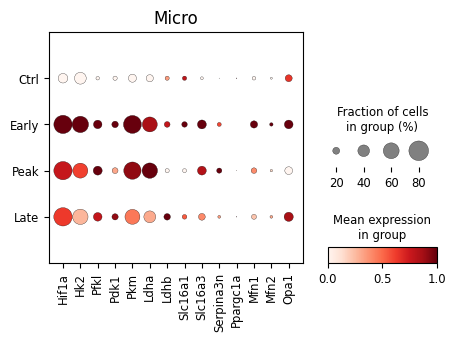

Epen


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


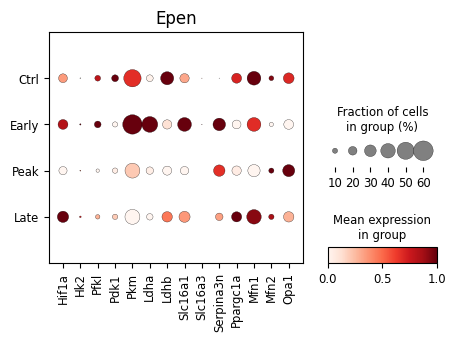

COP


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


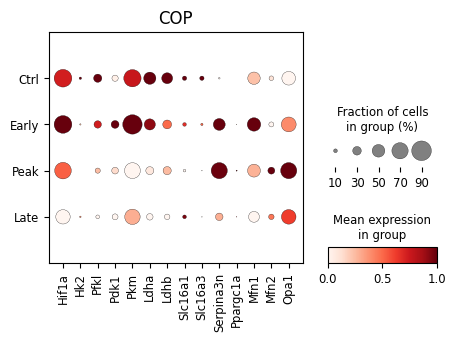

Neuron


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


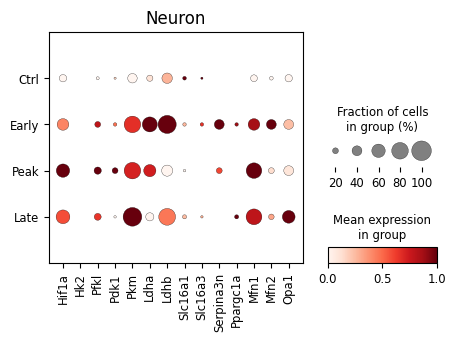

In [93]:
genes = ['Hif1a','Hk2','Pfkl','Pdk1','Pkm','Ldha','Ldhb','Slc16a1','Slc16a3','Serpina3n','Ppargc1a',"Mfn1","Mfn2","Opa1"]

for cell in adata.obs.cellType.unique():
    print(cell)
    # Create dotplot (returns a dict of Figures when var_names is a dict)
    sc.pl.dotplot(
        adata[adata.obs.cellType == cell],
        var_names=genes,
        groupby="orig.ident_merge",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        dendrogram=False,
        figsize=(5, 3),
        categories_order=['Ctrl','Early','Peak','Late'],
        title=cell
    )


In [111]:
# ============================================
# Dot plot across TIMEPOINTS (single-cell)
# mean (color) + % expressing (size)
# ============================================
import numpy as np, pandas as pd
import scipy.sparse as sp
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Optional, List, Tuple

# -------- helpers --------
def _to_dense(X): return X.toarray() if sp.issparse(X) else np.asarray(X)

def _get_expr_matrix(adata, layer=None):
    X = adata.layers[layer] if (layer is not None and layer in adata.layers) else adata.X
    return _to_dense(X)

def _ensure_genes_present(adata, genes):
    pres = [g for g in genes if g in adata.var_names]
    miss = [g for g in genes if g not in adata.var_names]
    if miss: print(f"[warn] skipping {len(miss)} missing genes:", miss[:20], "..." if len(miss)>20 else "")
    return pres

# -------- summaries (per timepoint) --------
def summarize_by_time(
    adata, genes, celltype,
    time_col="timepoint",
    ct_col="cell_type",
    layer=None,
    detect_threshold=0.0,
    time_order: Optional[List[str]] = None
) -> pd.DataFrame:
    """Return tidy table with columns: cell_type, time, gene, mean, pct_expressing, n_cells."""
    genes = _ensure_genes_present(adata, genes)
    if not genes: return pd.DataFrame()

    mask = adata.obs[ct_col].astype(str).eq(celltype) & adata.obs[time_col].notna()
    sub = adata[mask, genes]
    if sub.n_obs == 0:
        print(f"[warn] no cells for {celltype}")
        return pd.DataFrame()

    X = _get_expr_matrix(sub, layer=layer)
    df = pd.DataFrame(X, index=sub.obs_names, columns=genes)
    df["time"] = sub.obs[time_col].astype(str).values

    if time_order is None:
        # keep alphanumeric order
        time_order = sorted(df["time"].unique(), key=lambda s: (len(s), s))

    rows = []
    for t in time_order:
        dt = df[df["time"] == t]
        if dt.empty: continue
        for g in genes:
            vals = dt[g].astype(float).values
            rows.append({
                "cell_type": celltype,
                "time": t,
                "gene": g,
                "mean": float(vals.mean()),
                "pct_expressing": float((vals > detect_threshold).mean()),
                "n_cells": int(len(vals))
            })
    out = pd.DataFrame(rows)
    if out.empty: return out
    out["time"] = pd.Categorical(out["time"], categories=time_order, ordered=True)
    return out.sort_values(["gene","time"])

def compute_zscores_vs_baseline(df: pd.DataFrame, baseline_time: Optional[str] = None) -> pd.DataFrame:
    """Add z-scores per gene across time; if baseline_time given, add z_vs_baseline anchored there."""
    if df.empty: return df.copy()
    out = df.copy()

    # variance across time per gene
    sd_by_gene = out.groupby(["gene"])["mean"].std(ddof=1).replace(0, np.nan)
    mean_by_gene = out.groupby(["gene"])["mean"].mean()

    out = out.join(sd_by_gene.rename("sd_gene"), on="gene")
    out = out.join(mean_by_gene.rename("mean_gene"), on="gene")

    out["z_within_gene"] = ((out["mean"] - out["mean_gene"]) / out["sd_gene"]).replace([np.inf,-np.inf], np.nan).fillna(0.0)

    if baseline_time is not None:
        base = (out.loc[out["time"].astype(str)==str(baseline_time), ["gene","mean"]]
                  .drop_duplicates("gene").rename(columns={"mean":"mean_baseline"}).set_index("gene"))
        out = out.join(base, on="gene")
        out["z_vs_baseline"] = ((out["mean"] - out["mean_baseline"]) / out["sd_gene"])\
                                 .replace([np.inf,-np.inf], np.nan).fillna(0.0)
    return out

# -------- pretty dotplot --------
def plot_dotplot_time(
    df: pd.DataFrame,
    title: str = "Dotplot across time",
    color_mode: str = "log1p_mean",    # "mean" | "log1p_mean" | "z_within_gene" | "z_vs_baseline"
    cmap: Optional[str] = None,
    size_range: Tuple[int,int] = (20, 300),
    sort_genes: Optional[str] = "mean",   # "mean" | "pct" | "z" | "name" | None
    sort_genes_time: Optional[str] = None,
    vmin: Optional[float] = None,
    vmax: Optional[float] = None,
):
    if df.empty:
        print("[warn] nothing to plot")
        return

    plot_df = df.copy()
    # choose color values
    if color_mode == "log1p_mean":
        plot_df["color_val"] = np.log1p(plot_df["mean"]); cmap = cmap or "rocket_r"; cbar_label="log1p(mean)"
    elif color_mode == "mean":
        plot_df["color_val"] = plot_df["mean"]; cmap = cmap or "rocket_r"; cbar_label="mean"
    elif color_mode == "z_within_gene":
        assert "z_within_gene" in plot_df.columns, "run compute_zscores_vs_baseline first"
        plot_df["color_val"] = plot_df["z_within_gene"]; cmap = cmap or "coolwarm"; cbar_label="z (within gene)"
    elif color_mode == "z_vs_baseline":
        assert "z_vs_baseline" in plot_df.columns, "run compute_zscores_vs_baseline(..., baseline_time=...) first"
        plot_df["color_val"] = plot_df["z_vs_baseline"]; cmap = cmap or "coolwarm"; cbar_label="z vs baseline"
        if vmin is None or vmax is None:
            m = np.nanmax(np.abs(plot_df["color_val"].values)); vmin, vmax = -m, m
    else:
        raise ValueError("bad color_mode")

    # gene sorting
    if sort_genes in {"mean","pct","z"}:
        metric = {"mean":"mean", "pct":"pct_expressing", "z":"color_val"}[sort_genes]
        if sort_genes_time is None:
            order = plot_df.groupby("gene")[metric].mean().sort_values(ascending=False).index.tolist()
        else:
            sub = plot_df.loc[plot_df["time"].astype(str)==str(sort_genes_time)]
            order = sub.groupby("gene")[metric].mean().sort_values(ascending=False).index.tolist()
        plot_df["gene"] = pd.Categorical(plot_df["gene"], categories=order, ordered=True)
    elif sort_genes == "name":
        plot_df["gene"] = pd.Categorical(plot_df["gene"], categories=sorted(plot_df["gene"].unique()), ordered=True)

    plot_df["pct_plot"] = plot_df["pct_expressing"] * 100.0

    fig_w = max(3, 0.9 * plot_df["time"].nunique())
    fig_h = 0.25 * plot_df["gene"].nunique() + 2.5
    plt.figure(figsize=(fig_w + 1.5, fig_h))   # widen a bit
    ax = sns.scatterplot(
        data=plot_df,
        x="time", y="gene",
        size="pct_plot", sizes=size_range,
        hue="color_val", palette=cmap,
        edgecolor="0.25", linewidth=0.3, alpha=0.95,
        zorder=2, clip_on=False   # <-- don't crop markers at axes
    )
    
    # add some margins so dots have space
    plt.margins(x=0.2, y=0.05)
    ax.invert_yaxis()
    ax.set_xlabel("Timepoint")
    ax.set_ylabel("")
    ax.set_title(title, weight="bold")

    # colorbar
    norm = plt.Normalize(vmin if vmin is not None else plot_df["color_val"].min(),
                         vmax if vmax is not None else plot_df["color_val"].max())
    sm = plt.cm.ScalarMappable(cmap=sns.color_palette(cmap, as_cmap=True), norm=norm)
    sm.set_array([])
    cbar = ax.figure.colorbar(sm, ax=ax, pad=0.02, fraction=0.03, aspect=20)
    cbar.set_label(cbar_label)

    # size legend
    for leg in ax.get_legend_handles_labels()[0:1]: pass
    if ax.get_legend(): ax.get_legend().remove()
    pct_levels = (10, 50, 90)
    handles = [plt.Line2D([0],[0], marker='o', linestyle='', markerfacecolor='none',
                          markeredgecolor='0.4', markersize=np.interp(p,[0,100], [np.sqrt(size_range[0]/np.pi)*2,
                                                                                  np.sqrt(size_range[1]/np.pi)*2]))
               for p in pct_levels]
    ax.legend(handles, [f"{p}%" for p in pct_levels], title="% expressing",
              frameon=False, loc="upper left", bbox_to_anchor=(1.02, 1.0), fontsize=9, title_fontsize=10)

    ax.grid(True, axis="x", color="0.92", lw=0.7)
    plt.xticks(rotation=35, ha="right")
    
    # italicize gene names
    for lab in ax.get_yticklabels():
        lab.set_fontstyle("italic")
    
    plt.tight_layout()
    plt.show()

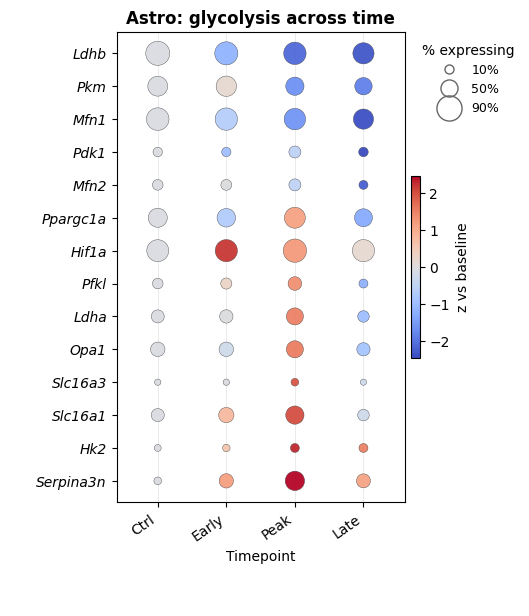

In [112]:
genes = ['Hif1a','Hk2','Pfkl','Pdk1','Pkm','Ldha','Ldhb','Slc16a1','Slc16a3','Serpina3n','Ppargc1a',"Mfn1","Mfn2","Opa1"]
celltype = "Astro"
time_col = "orig.ident_merge"      # e.g., values: "T0","T1","T2","T3"
ct_col   = "cellType"
layer    = None             # or name of your expression layer

# 1) summarize
tbl = summarize_by_time(adata, genes, celltype, time_col=time_col, ct_col=ct_col, layer=layer,
                        detect_threshold=0.0, time_order=['Ctrl','Early','Peak','Late'])

# 2) z-scores (optional): anchor at baseline T0
tblz = compute_zscores_vs_baseline(tbl, baseline_time="Ctrl")

# 3) plot
plot_dotplot_time(tblz,
                  title=f"{celltype}: glycolysis across time",
                  color_mode="z_vs_baseline",   # or "log1p_mean"
                  sort_genes="z",               # or "mean"/"pct"/"name"/None
                  sort_genes_time="Peak")         # bin used for ranking

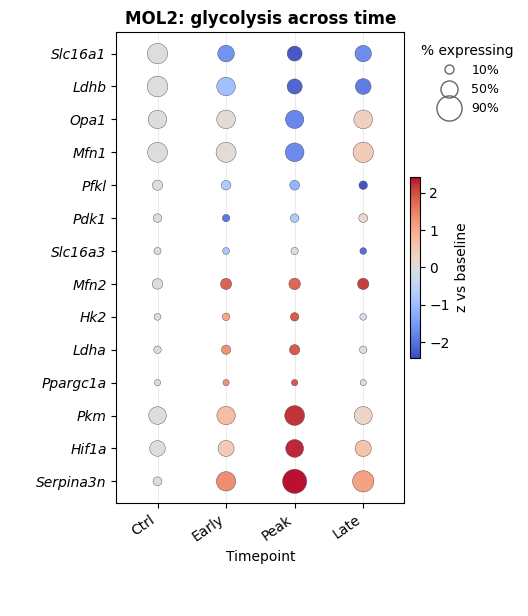

In [113]:
genes = ['Hif1a','Hk2','Pfkl','Pdk1','Pkm','Ldha','Ldhb','Slc16a1','Slc16a3','Serpina3n','Ppargc1a',"Mfn1","Mfn2","Opa1"]
celltype = "MOL2"
time_col = "orig.ident_merge"      # e.g., values: "T0","T1","T2","T3"
ct_col   = "cellType"
layer    = None             # or name of your expression layer

# 1) summarize
tbl = summarize_by_time(adata, genes, celltype, time_col=time_col, ct_col=ct_col, layer=layer,
                        detect_threshold=0.0, time_order=['Ctrl','Early','Peak','Late'])

# 2) z-scores (optional): anchor at baseline T0
tblz = compute_zscores_vs_baseline(tbl, baseline_time="Ctrl")

# 3) plot
plot_dotplot_time(tblz,
                  title=f"{celltype}: glycolysis across time",
                  color_mode="z_vs_baseline",   # or "log1p_mean"
                  sort_genes="z",               # or "mean"/"pct"/"name"/None
                  sort_genes_time="Peak")         # bin used for ranking

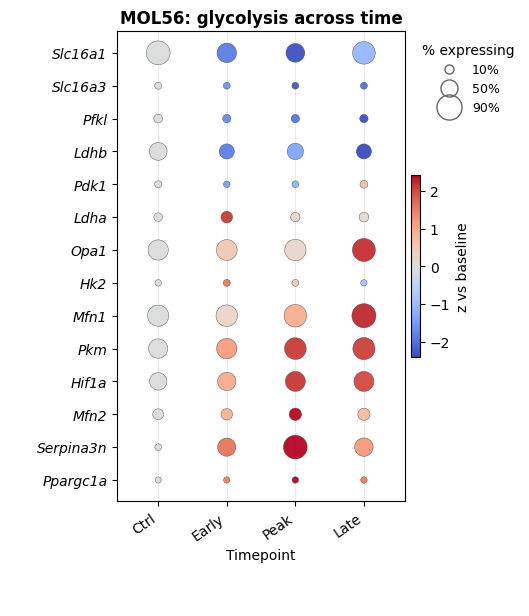

In [114]:
genes = ['Hif1a','Hk2','Pfkl','Pdk1','Pkm','Ldha','Ldhb','Slc16a1','Slc16a3','Serpina3n','Ppargc1a',"Mfn1","Mfn2","Opa1"]
celltype = "MOL56"
time_col = "orig.ident_merge"      # e.g., values: "T0","T1","T2","T3"
ct_col   = "cellType"
layer    = None             # or name of your expression layer

# 1) summarize
tbl = summarize_by_time(adata, genes, celltype, time_col=time_col, ct_col=ct_col, layer=layer,
                        detect_threshold=0.0, time_order=['Ctrl','Early','Peak','Late'])

# 2) z-scores (optional): anchor at baseline T0
tblz = compute_zscores_vs_baseline(tbl, baseline_time="Ctrl")

# 3) plot
plot_dotplot_time(tblz,
                  title=f"{celltype}: glycolysis across time",
                  color_mode="z_vs_baseline",   # or "log1p_mean"
                  sort_genes="z",               # or "mean"/"pct"/"name"/None
                  sort_genes_time="Peak")         # bin used for ranking

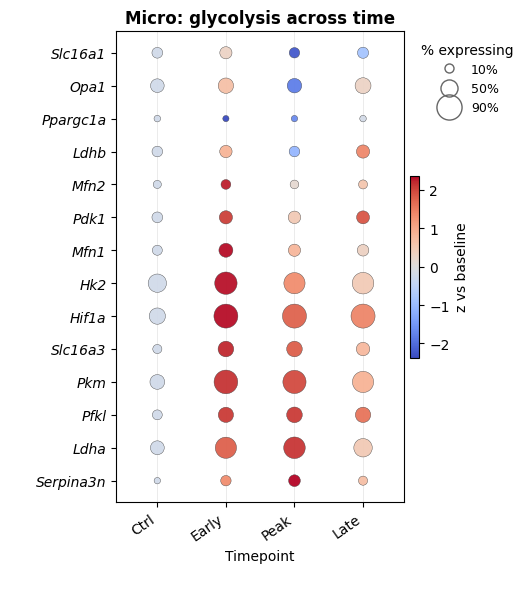

In [118]:
genes = ['Hif1a','Hk2','Pfkl','Pdk1','Pkm','Ldha','Ldhb','Slc16a1','Slc16a3','Serpina3n','Ppargc1a',"Mfn1","Mfn2","Opa1"]
celltype = "Micro"
time_col = "orig.ident_merge"      # e.g., values: "T0","T1","T2","T3"
ct_col   = "cellType"
layer    = None             # or name of your expression layer

# 1) summarize
tbl = summarize_by_time(adata, genes, celltype, time_col=time_col, ct_col=ct_col, layer=layer,
                        detect_threshold=0.0, time_order=['Ctrl','Early','Peak','Late'])

# 2) z-scores (optional): anchor at baseline T0
tblz = compute_zscores_vs_baseline(tbl, baseline_time="Ctrl")

# 3) plot
plot_dotplot_time(tblz,
                  title=f"{celltype}: glycolysis across time",
                  color_mode="z_vs_baseline",   # or "log1p_mean"
                  sort_genes="z",               # or "mean"/"pct"/"name"/None
                  sort_genes_time="Peak")         # bin used for ranking

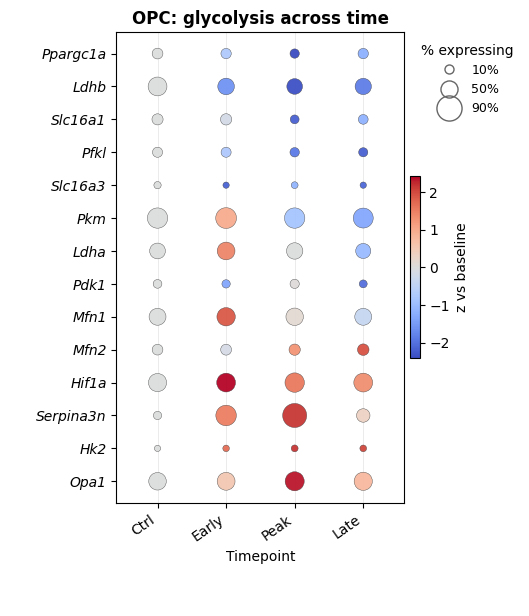

In [115]:
genes = ['Hif1a','Hk2','Pfkl','Pdk1','Pkm','Ldha','Ldhb','Slc16a1','Slc16a3','Serpina3n','Ppargc1a',"Mfn1","Mfn2","Opa1"]
celltype = "OPC"
time_col = "orig.ident_merge"      # e.g., values: "T0","T1","T2","T3"
ct_col   = "cellType"
layer    = None             # or name of your expression layer

# 1) summarize
tbl = summarize_by_time(adata, genes, celltype, time_col=time_col, ct_col=ct_col, layer=layer,
                        detect_threshold=0.0, time_order=['Ctrl','Early','Peak','Late'])

# 2) z-scores (optional): anchor at baseline T0
tblz = compute_zscores_vs_baseline(tbl, baseline_time="Ctrl")

# 3) plot
plot_dotplot_time(tblz,
                  title=f"{celltype}: glycolysis across time",
                  color_mode="z_vs_baseline",   # or "log1p_mean"
                  sort_genes="z",              # or "mean"/"pct"/"name"/None
                  sort_genes_time="Peak")         # bin used for ranking